# IMPORTAR LIBRERIAS

In [45]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline  
#%matplotlib qt
# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

# FILTRO GAUSSIANO

In [46]:
def create_gauss_filter (h, w, k_size, sigma):

    nucleo_g = cv.getGaussianKernel(ksize=k_size, sigma=sigma)
    kernel = nucleo_g * nucleo_g.T
    fft = np.fft.fft2(kernel)

    return kernel, fft

# METRICAS DE DESENFOQUE

## Image Sharpness Measure

In [73]:
def Image_Sharpness_Measure(imagen: np.ndarray):
    """
    Descripcion:
        La técnica propuesta consiste en calcular el valor absoluto de la transformada de Fourier
        centrada de la imagen y encontrar el valor máximo de la componente de frecuencia.

        Luego se fija un valor umbral para los componentes de alta frecuencia y se calcula el
        número de componentes de alta frecuencia por encima del umbral para determinar la puntuación
        de calidad de la imagen.

    Args:
        imagen (np.ndarray): Imagen a Procesar

    Returns:
        Float: Medida de calidad de imagen (FM) donde FM significa
        Medida de Difuminación de Imagen en el Dominio de Frecuencia.
    """

    # Paso 1 - Calcular F, que es la Fft de la imagen.
    F = np.fft.fft2(imagen)

    # Paso 2 - Encontrar Fc, que se obtiene desplazando el origen de F al centro.
    Fc = np.fft.fftshift(F)

    # Paso 3 - Calcular AF, que es el valor absoluto de Fc.
    AF = np.abs(Fc)

    # Paso 4 - Obtener Max_AF, que es el valor máximo de AF.
    Max_AF = np.max(AF)

    # Paso 5 - Calcular Th, que es el número total de píxeles en F cuyo valor de píxel > umbral (M/1000).
    Th = np.sum(F > (Max_AF/1000))

    # Paso 6 - Calcular FM, dada por: FM = Th / (M x N), donde M y N son las filas y columnas de la imagen.
    
    M = imagen.shape[0]
    N = imagen.shape[1]

    FM = Th / (M * N)

    return FM

## A.15 Tenengrad (GRA6)

In [48]:
def Tenengrad(imagen: np.ndarray):
    """
    Descripcion:
        Una medida de enfoque popular basada en la magnitud del gradiente de la imagen
        se define como la sumatoria de los cuadrados de los gradientes de la imagen en
        las direcciones X e Y.

        Dichos gradientes son calculados mediante la convolución de la imagen dada
        con los operadores Sobel.

        La idea detrás de esta métrica es que los bordes y detalles nítidos en una imagen
        tendrán gradientes más pronunciados, y elevar al cuadrado estos gradientes resaltará
        aún más las áreas enfocadas.

        Cuanto mayor sea la suma, mayor será la presencia de bordes y detalles nítidos,
        lo que podría indicar un mayor enfoque.

    Args:
        imagen (np.ndarray): Imagen a Procesar

    Returns:
        Float: Metrica de enfoque
    """

    # Calcula el gradiente de la imagen
    gradiente_x = cv.Sobel(imagen, cv.CV_64F, 1, 0, ksize=3)
    gradiente_y = cv.Sobel(imagen, cv.CV_64F, 0, 1, ksize=3)

    # Calcula el índice de enfoque
    enfoque = np.sum(gradiente_x ** 2 + gradiente_y ** 2)

    return enfoque

## A.24 Gray-level Variance (STA3)

In [47]:
def Gray_level_variance(imagen: np.ndarray):
    """
    Descripcion:
        Esta función calcula la varianza de una imagen para utilizarla como
        medida de desenfoque.

        Se utiliza principalmente para medir contraste, sin embargo una varianza alta
        puede significar un mejor enfoque.

        Se calcula de forma Automatica y manual para comparar resultados.

    Args:
        imagen (np.ndarray): Imagen a Procesar

    Returns:
        tuple: Una tupla que contiene los siguientes valores:
            - Float: Varianza calculada de forma automatica.
            - Float: Varianza calculada de forma manual.
    """

    # Calcular la varianza mediante Numpy
    Varianza_Np = np.var(imagen)

    # Calcular la media de niveles de gris
    media = np.mean(imagen)

    # Calcular la varianza manualmente
    Varianza = sum(sum((imagen - media) ** 2)) / (imagen.shape[0] * imagen.shape[1])

    return Varianza_Np, Varianza

# CARGA DE IMAGENES

In [49]:
Messi = cv.imread('..\Material_TPs\TP2\Messi.jpg', cv.IMREAD_GRAYSCALE)

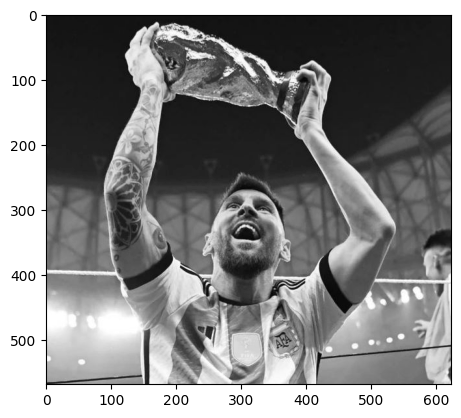

In [50]:
plt.figure()
plt.imshow(Messi, cmap='gray')
plt.show()

In [51]:
result_b = cv.GaussianBlur(Messi, ksize=(17, 17), sigmaX=5)

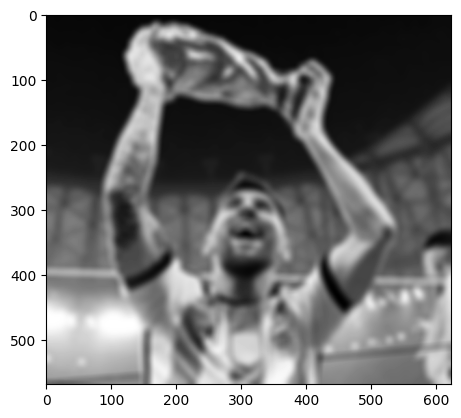

In [52]:
plt.figure()
plt.imshow(result_b, cmap='gray')
plt.show()

In [53]:
kernel, fft =create_gauss_filter(10,10,17,5)

In [54]:
# Calcula la transformada de Fourier 2D de la imagen
fft_imagen = np.fft.fft2(Messi)

fft_kernel = np.fft.fft2(kernel, s=Messi.shape)

# Aplica la convolución en el dominio de la frecuencia
fft_resultado = fft_imagen * fft_kernel

# Calcula la transformada inversa de Fourier para obtener la imagen filtrada
resultado = np.fft.ifft2(fft_resultado).real

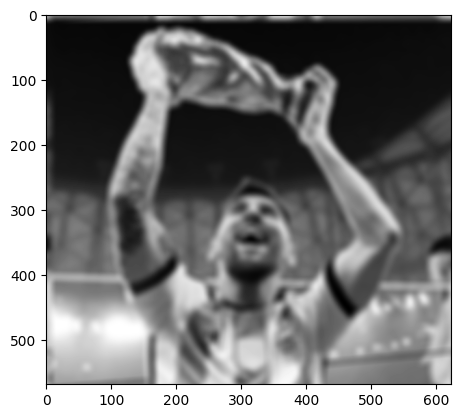

In [55]:
plt.figure()
plt.imshow(resultado, cmap='gray')
plt.show()

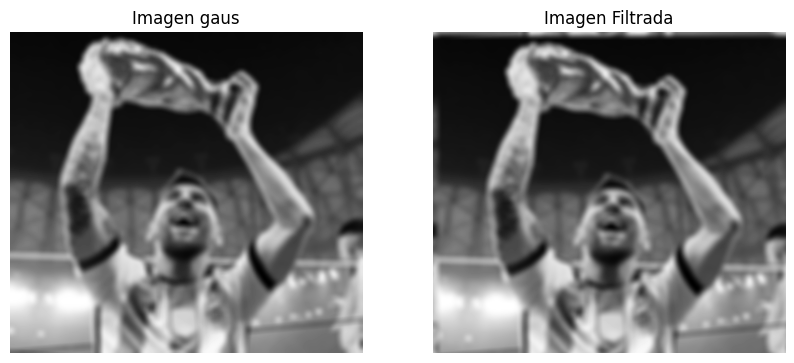

In [56]:
plt.figure(figsize=(10, 8))

# Subplot para la imagen original
plt.subplot(1, 2, 1)
plt.imshow(result_b, cmap='gray')
plt.title('Imagen gaus')
plt.axis('off')

# Subplot para la imagen filtrada
plt.subplot(1, 2, 2)
plt.imshow(resultado, cmap='gray')
plt.title('Imagen Filtrada')
plt.axis('off')

# Muestra las imágenes
plt.show()

# RESULTADOS DE LAS METRICAS

In [74]:
print ("IQM")
print(Image_Sharpness_Measure(Messi))
print(Image_Sharpness_Measure(result_b))

IQM
0.009229529989635438
0.0026615519805326484


In [59]:
print ("Tenengrad")
print(Tenengrad(Messi))
print(Tenengrad(result_b))

Tenengrad
5126557138.0
411105836.0


In [60]:
print ("GLV")
print(Gray_level_variance(Messi))
print(Gray_level_variance(result_b))

GLV
(4894.820845061808, 4894.820845061803)
(4010.3422898314698, 4010.3422898314648)
